In [1]:
from google.colab import files

In [2]:
uploaded_image = files.upload()

Saving Labeled_Spines_SmirnovEtAl2018.zip to Labeled_Spines_SmirnovEtAl2018.zip


In [3]:
uploaded_spine_info = files.upload()

Saving Labeled_Spines_SmirnovEtAl2018.zip to Labeled_Spines_SmirnovEtAl2018 (1).zip


In [4]:
uploaded_bounding_box = files.upload()

Saving Labeled_Spines_SmirnovEtAl2018.zip to Labeled_Spines_SmirnovEtAl2018 (2).zip


In [29]:
import pandas as pd
import zipfile

# Path to the ZIP archive
zip_file_path = "/Labeled_Spines_SmirnovEtAl2018.zip"
# Extract the CSV file from the ZIP archive
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    csv_file_name = zip_ref.namelist()[0]  # Assuming the CSV file is the first one in the archive
    with zip_ref.open(csv_file_name) as csv_file:
        # Read the CSV file with pandas
        data = pd.read_csv(csv_file)

In [7]:
print(data.head())
print(data.info())

   77.52  37.52  40.96  40.96.1
0  38.52  29.52  40.96    40.96
1  99.52   5.52  40.96    40.96
2   8.52  -7.48  40.96    40.96
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   77.52    3 non-null      float64
 1   37.52    3 non-null      float64
 2   40.96    3 non-null      float64
 3   40.96.1  3 non-null      float64
dtypes: float64(4)
memory usage: 224.0 bytes
None


In [31]:
import pandas as pd
from sklearn.cluster import KMeans


data = pd.DataFrame({
    'feature1': [77.52, 38.52, 99.52, 8.52],
    'feature2': [37.52, 29.52, 5.52, -7.48],
    'feature3': [40.96, 40.96, 40.96, 40.96],
    'feature4': [40.96, 40.96, 40.96, 40.96]
})

kmeans = KMeans(n_clusters=2, random_state=42)
# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Print the clusters
print(data)


   feature1  feature2  feature3  feature4  cluster
0     77.52     37.52     40.96     40.96        0
1     38.52     29.52     40.96     40.96        1
2     99.52      5.52     40.96     40.96        0
3      8.52     -7.48     40.96     40.96        1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
import pandas as pd
from sklearn.cluster import KMeans


data = pd.DataFrame({
    'feature1': [77.52, 38.52, 99.52, 8.52],
    'feature2': [37.52, 29.52, 5.52, -7.48],
    'feature3': [40.96, 40.96, 40.96, 40.96],
    'feature4': [40.96, 40.96, 40.96, 40.96]
})

# Instantiate the KMeans model with n_init explicitly set
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)  # You can choose the number of clusters

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['cluster'] = cluster_labels

# Print the clusters
print(data)


   feature1  feature2  feature3  feature4  cluster
0     77.52     37.52     40.96     40.96        0
1     38.52     29.52     40.96     40.96        1
2     99.52      5.52     40.96     40.96        0
3      8.52     -7.48     40.96     40.96        1


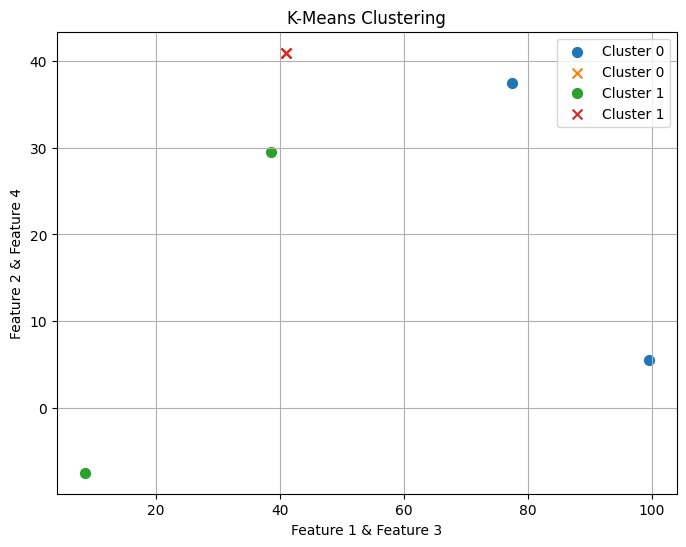

In [14]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(8, 6))

# Plot data points for each cluster
for cluster_id in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster_id]
    plt.scatter(cluster_data['feature1'], cluster_data['feature2'], label=f'Cluster {cluster_id}', marker='o', s=50)  # Plot feature1 vs feature2
    plt.scatter(cluster_data['feature3'], cluster_data['feature4'], label=f'Cluster {cluster_id}', marker='x', s=50)  # Plot feature3 vs feature4

# Add labels and legend
plt.xlabel('Feature 1 & Feature 3')
plt.ylabel('Feature 2 & Feature 4')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [13]:
print(data)



   feature1  feature2  feature3  feature4  cluster
0     77.52     37.52     40.96     40.96        0
1     38.52     29.52     40.96     40.96        1
2     99.52      5.52     40.96     40.96        0
3      8.52     -7.48     40.96     40.96        1


In [17]:
# Check if 'kmeans' variable exists and if it's a KMeans model
if 'kmeans' in locals() and isinstance(kmeans, KMeans):
    print("KMeans model has been trained.")
else:
    print("KMeans model has not been trained yet.")


KMeans model has been trained.


In [32]:

data = data.drop(columns=['cluster'])

# Use the trained KMeans model to predict cluster labels for the data
predicted_clusters = kmeans.predict(data)

# Print the predicted cluster labels
print(predicted_clusters)


[0 1 0 1]


In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


predicted_clusters = kmeans.predict(data)

# Compute silhouette score
silhouette_avg = silhouette_score(data, predicted_clusters)
print("Silhouette Score:", silhouette_avg)

# Compute Calinski-Harabasz Index
ch_score = calinski_harabasz_score(data, predicted_clusters)
print("Calinski-Harabasz Index:", ch_score)

# Compute Davies-Bouldin Index
db_score = davies_bouldin_score(data, predicted_clusters)
print("Davies-Bouldin Index:", db_score)


Silhouette Score: 0.3551074597682917
Calinski-Harabasz Index: 4.591209954990733
Davies-Bouldin Index: 0.6566187919093665


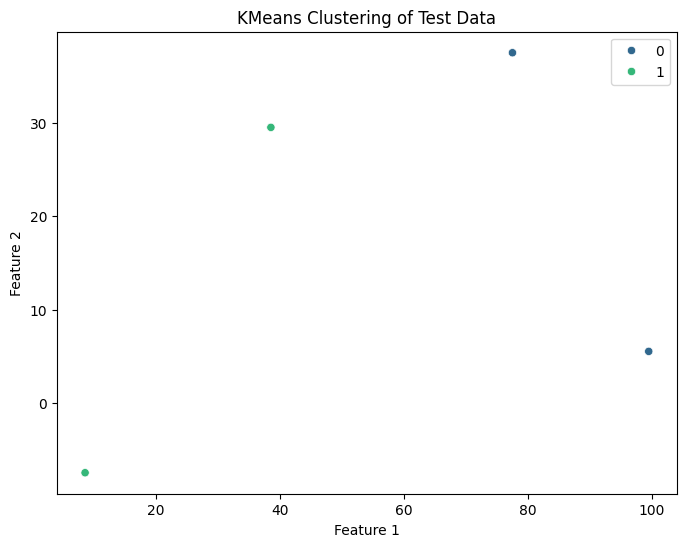

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame containing the test data points
# and 'predicted_clusters' contains the predicted cluster labels

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='feature1', y='feature2', hue=predicted_clusters, palette='viridis', legend='full')
plt.title('KMeans Clustering of Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
